# Đề tài Gán nhãn từ loại

In [ ]:
from google.colab import drive
from collections import defaultdict
import unicodedata as ud
import pandas as pd
import numpy as np
import re #Regular Expression
import ast
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Tạo các từ điển n_grams từ từ điển gốc

In [ ]:
data = open("/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/Dataset/Dictionary.txt", encoding="utf-8").readlines()
print(len(data))
data[0:5]

31158


['a\n', 'A\n', 'a dua\n', 'a ha\n', 'a lô\n']

In [ ]:
set_data = set(data)
print(len(set_data))

31158


In [ ]:
sorted_data = sorted(set_data)
print(len(sorted_data))

31158


In [ ]:
with open("/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/Dataset/my_vocabs_2.txt", "w" ,encoding="utf-8") as f:
  for word in sorted_data:
    word = word.replace('\n', '')
    f.write(f'{word}\n')

In [ ]:
def check_space(string):
    return string.count(" ")

one_grams = set()
two_grams = set()
three_grams = set()
four_grams = set()
five_grams = set()
for word in sorted_data:
  word = word.replace('\n', '')
  if check_space(word) == 1:
    two_grams.add(word)
  elif check_space(word) == 2:
    three_grams.add(word)
  elif check_space(word) == 3:
    four_grams.add(word)
  elif check_space(word) == 4:
    five_grams.add(word)
  else:
    one_grams.add(word)

print(len(one_grams))
print(len(two_grams))
print(len(three_grams))
print(len(four_grams))
print(len(five_grams))

5766
22705
1907
763
17


In [ ]:
two_grams = sorted(two_grams)
two_grams[:5]

['Bắc Cực', 'Bắc Đẩu', 'Chức Nữ', 'Công giáo', 'Cựu Ước']

In [ ]:
with open("/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/Dataset/my_bi_grams.txt", "w" ,encoding="utf-8") as f:
  for word in two_grams:
    f.write(f'{word}\n')

In [ ]:
print(len(three_grams))
three_grams = sorted(three_grams)
three_grams[:5]

1907


['Bà La Môn',
 'Chính Thống giáo',
 'Cơ Đốc giáo',
 'Hệ Mặt Trời',
 'Mạnh Thường Quân']

In [ ]:
with open("/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/Dataset/my_tri_grams.txt", "w" ,encoding="utf-8") as f:
  for word in three_grams:
    f.write(f'{word}\n')

In [ ]:
print(len(four_grams))
four_grams = sorted(four_grams)

with open("/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/Dataset/my_quadri_grams.txt", "w" ,encoding="utf-8") as f:
  for word in four_grams:
    f.write(f'{word}\n')


763


In [ ]:
print(len(five_grams))
five_grams = sorted(five_grams)

with open("/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/Dataset/my_penta_grams.txt", "w" ,encoding="utf-8") as f:
  for word in five_grams:
    f.write(f'{word}\n')

17


Tải ngữ liệu thu thập

In [ ]:
sentences = open("/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/data_sentences.txt", encoding="utf-8").readlines()

In [ ]:
print(len(sentences))

sentences[0:2]

90


['Đồng bằng sông Cửu Long được ưu tiên bố trí vốn đầu tư các tuyến cao tốc, trong đó chú trọng dự án đường sắt tốc độ cao TP HCM – Cần Thơ, theo lãnh đạo Chính phủ.\n',
 'Trong nhiệm kỳ này, Chính phủ đã bố trí khoảng 400.000 tỷ đồng cho hạ tầng giao thông, gấp 3-4 lần nhiệm kỳ trước.\n']

Tách từ sử dụng Longest Matching

In [ ]:
def syllablize(sentence):
    word = '\w+'
    non_word = '[^\w\s]'
    digits = '\d+([\.,_]\d+)+'
    date_or_fraction = '(\d{1,2}[/-]\d{1,2}[/-]\d{1,4}|\d{1,6}[/-]\d{1,6})'
    patterns = []
    patterns.extend([date_or_fraction, digits, word, non_word])
    patterns = f"({'|'.join(patterns)})"
    sentence = ud.normalize('NFC', sentence)
    tokens = re.findall(patterns, sentence, re.UNICODE)
    return [token[0] for token in tokens]

def load_n_grams(path):
    with open(path, encoding='utf8') as f:
      words = f.read().split('\n')
    return words

def longest_matching(sentence, bi_grams, tri_grams, quadri_grams, penta_grams):
    syllables = syllablize(sentence)
    syl_len = len(syllables)
    
    curr_id = 0
    word_list = []
    done = False
    
    while curr_id < syl_len and not done:
      curr_word = syllables[curr_id]
      if curr_id >= syl_len - 1:
        word_list.append(curr_word)
        done = True
      else:
        second_word = syllables[curr_id + 1]
        pair_word = ' '.join([curr_word, second_word])
        if curr_id >= syl_len - 2:
          if (pair_word in bi_grams) or (pair_word.lower() in bi_grams):
            word_list.append('_'.join([curr_word, second_word]))
            curr_id += 2
          else:
            word_list.append(curr_word)
            curr_id += 1
        else:
          third_word = syllables[curr_id + 2]
          triple_word = ' '.join([pair_word, third_word])
          if curr_id >= syl_len - 3:
            if (triple_word in tri_grams) or (triple_word.lower() in tri_grams):
              word_list.append('_'.join([curr_word, second_word, third_word]))
              curr_id += 3
            elif (pair_word in bi_grams) or (pair_word.lower() in bi_grams):
              word_list.append('_'.join([curr_word, second_word]))
              curr_id += 2
            else:
              word_list.append(curr_word)
              curr_id += 1
          else:
            fourth_word = syllables[curr_id + 3]
            quadra_word = ' '.join([triple_word, fourth_word])
            if curr_id >= syl_len - 4:
              if (quadra_word in quadri_grams) or (quadra_word.lower() in quadri_grams):
                word_list.append('_'.join([curr_word, second_word, third_word, fourth_word]))
                curr_id += 4
              elif (triple_word in tri_grams) or (triple_word.lower() in tri_grams):
                word_list.append('_'.join([curr_word, second_word, third_word]))
                curr_id += 3
              elif (pair_word in bi_grams) or (pair_word.lower() in bi_grams):
                word_list.append('_'.join([curr_word, second_word]))
                curr_id += 2
              else:
                word_list.append(curr_word)
                curr_id += 1
            else:
              fifth_word = syllables[curr_id + 4]
              penta_word = ' '.join([quadra_word, fifth_word])
              if (penta_word in penta_grams) or (penta_word.lower() in penta_grams):
                word_list.append('_'.join([curr_word, second_word, third_word, fourth_word, fifth_word]))
                curr_id += 5
              elif (quadra_word in quadri_grams) or (quadra_word.lower() in quadri_grams):
                word_list.append('_'.join([curr_word, second_word, third_word, fourth_word]))
                curr_id += 4
              elif (triple_word in tri_grams) or (triple_word.lower() in tri_grams):
                word_list.append('_'.join([curr_word, second_word, third_word]))
                curr_id += 3
              elif (pair_word in bi_grams) or (pair_word.lower() in bi_grams):
                word_list.append('_'.join([curr_word, second_word]))
                curr_id += 2
              else:
                word_list.append(curr_word)
                curr_id += 1

    return word_list

In [ ]:
bi_grams = load_n_grams('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/Dataset/my_bi_grams.txt')
tri_grams = load_n_grams('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/Dataset/my_tri_grams.txt')
quadri_grams = load_n_grams('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/Dataset/my_quadri_grams.txt')
penta_grams = load_n_grams('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/Dataset/my_penta_grams.txt')
longest_matching('U22 Indonesia vô địch SEA Games sau trận đấu có 7 bàn thắng, 7 thẻ đỏ', bi_grams, tri_grams, quadri_grams, penta_grams)

['U22',
 'Indonesia',
 'vô_địch',
 'SEA',
 'Games',
 'sau',
 'trận',
 'đấu',
 'có',
 '7',
 'bàn',
 'thắng',
 ',',
 '7',
 'thẻ_đỏ']

In [ ]:
with open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/longest_matching_tokens.txt', 'w', encoding='utf-8') as f:
    longest_matching_sentences = []
    for sentence in sentences:
        word_list = longest_matching(sentence, bi_grams, tri_grams, quadri_grams, penta_grams)
        longest_matching_sentences.append(' '.join(word_list))
        for word in word_list: 
          f.write(word + '\n')
        if sentence != sentences[-1]: f.write('\n')
    f.write('\n')
longest_matching_sentences[0:3]

['Đồng_bằng sông Cửu Long được ưu_tiên bố_trí vốn đầu_tư các tuyến cao_tốc , trong đó chú_trọng dự_án đường_sắt tốc_độ cao TP HCM – Cần Thơ , theo lãnh_đạo Chính_phủ .',
 'Trong nhiệm_kỳ này , Chính_phủ đã bố_trí khoảng 400.000 tỷ đồng cho hạ tầng giao_thông , gấp 3-4 lần nhiệm_kỳ trước .',
 'Quan_điểm này có cơ_sở khoa_học nhất_định khi nhiều nghiên_cứu trên thế_giới chỉ ra rằng điểm học_bạ phổ_thông có tương_quan tỷ_lệ_thuận với mức_độ sẵn_sàng học_tập ( readiness ) của sinh_viên .']

In [ ]:
count_longest_matching_compounds = 0
for sentence in longest_matching_sentences:
    for word in sentence.split():
        if '_' in word: count_longest_matching_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thuật toán Longest Matching:', count_longest_matching_compounds)

Số lượng từ ghép khi tách từ bằng thuật toán Longest Matching: 570


In [ ]:
!pip install vncorenlp
!pip install py_vncorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645933 sha256=c72c22dd6c7b578eca2880913acf3e15a443a80167668404801e63cb6aa7c833
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.2 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4305 sha256=0a542ef2d285c902c9016d23aae537805b6c5ddf2e9a049c64a81394b7e0f4ca
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827


In [ ]:
import py_vncorenlp
py_vncorenlp.download_model()
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"])

In [ ]:
with open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/vncore_tokens.txt', 'w', encoding='utf-8') as f:
    vncore_sentences = []
    for sentence in sentences:
        word_list = rdrsegmenter.word_segment(sentence)
        vncore_sentences.append(' '.join(word_list))
        for word in word_list:
          s = ""
          for i in range(len(word)):
            if word[i] != " " and word[i] != "." or (word[i] == "." and i+1 < len(word) and word[i+1] != " "):
              s += word[i]
            elif word[i] == ".":
              f.write("." + "\n")
            else:
              f.write(s + "\n")
              s = ""
        if sentence != sentences[-1]: 
          f.write('\n')
    f.write('\n')

In [ ]:
count_vncore_compounds = 0
for sentence in vncore_sentences:
    for word in sentence.split():
        if '_' in word: count_vncore_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP:', count_vncore_compounds)

Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP: 622


In [ ]:
!pip install pyvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 56.4 MB/s eta 0:00:00


In [ ]:
from pyvi import ViTokenizer, ViPosTagger

with open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/pyvi_tokens.txt', 'w', encoding='utf-8') as f:
    pyvi_tokenize_sentences = []
    for sentence in sentences:
      word_list = ViTokenizer.tokenize(sentence)
      pyvi_tokenize_sentences.append(word_list)
      for word in word_list.split():
          f.write(word + '\n')
      if sentence != sentences[-1]: 
        f.write('\n')
    f.write('\n')
pyvi_tokenize_sentences[0:3]

['Đồng_bằng sông Cửu_Long được ưu_tiên bố_trí vốn đầu_tư các tuyến cao_tốc , trong đó chú_trọng dự_án đường_sắt tốc_độ cao TP HCM – Cần_Thơ , theo lãnh_đạo Chính_phủ . \n',
 'Trong nhiệm_kỳ này , Chính_phủ đã bố_trí khoảng 400.000 tỷ đồng cho hạ_tầng giao_thông , gấp 3 - 4 lần nhiệm_kỳ trước . \n',
 'Quan_điểm này có cơ_sở khoa_học nhất_định khi nhiều nghiên_cứu trên thế_giới chỉ ra rằng điểm học_bạ phổ_thông có tương_quan tỷ_lệ_thuận với mức_độ sẵn_sàng học_tập ( readiness ) của sinh_viên . \n']

In [ ]:
count_pyvi_compounds = 0
for sentence in  pyvi_tokenize_sentences:
    for word in sentence.split():
        if '_' in word: count_pyvi_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thư viện pyvi:', count_pyvi_compounds)

Số lượng từ ghép khi tách từ bằng thư viện pyvi: 627


In [ ]:
with open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/manual_tokens.txt', 'r', encoding='utf-8') as f:
    manual_tokenize_sentences = []
    sentence = ''
    for word in f:
        if word == '\n': 
            manual_tokenize_sentences.append(sentence.strip())
            sentence = ''
        else: 
          sentence += word.replace('\n', ' ')
manual_tokenize_sentences[0:3]

['Đồng_bằng sông Cửu_Long được ưu_tiên bố_trí vốn đầu_tư các tuyến cao_tốc , trong đó chú_trọng dự_án đường_sắt tốc_độ cao TP HCM – Cần_Thơ , theo lãnh_đạo Chính_phủ .',
 'Trong nhiệm_kỳ này , Chính_phủ đã bố_trí khoảng 400.000 tỷ đồng cho hạ tầng giao_thông , gấp 3-4 lần nhiệm_kỳ trước .',
 'Quan_điểm này có cơ_sở khoa_học nhất_định khi nhiều nghiên_cứu trên thế_giới chỉ ra rằng điểm học_bạ phổ_thông có tương_quan tỷ_lệ_thuận với mức_độ sẵn_sàng học_tập ( readiness ) của sinh_viên .']

In [ ]:
count_manual_tokenize_compounds = 0
for sentence in manual_tokenize_sentences:
    for word in sentence.split():
        if '_' in word: count_manual_tokenize_compounds += 1
print('Số lượng từ ghép khi tách từ thủ công:', count_manual_tokenize_compounds)

Số lượng từ ghép khi tách từ thủ công: 641


Đánh giá tách từ

In [ ]:
def count_correct_words(pred, source, n_grams=5):
    pred_words = pred.split()
    source_words = source.split()
    
    total_true, tp = 0, 0
    total_errors, fp = 0, 0
    
    idx = 0
    while idx < len(pred_words):
        if pred_words[idx] not in source_words[idx:(idx + n_grams)]: 
            if '_' in pred_words[idx]: fp += 1
            del pred_words[idx]
            total_errors += 1
        else: idx += 1
    
    idx = 0
    while idx < len(source_words):
        if source_words[idx] not in pred_words[idx:(idx + n_grams)]: 
            del source_words[idx]
        else: idx += 1
    
    if len(pred_words) < len(source_words): words = pred_words
    else: words = source_words
    
    for idx in range (len(words)):
        if pred_words[idx] == source_words[idx]:
            if '_' in pred_words[idx]: tp += 1 
            total_true += 1
                    
    return total_true, total_errors, tp, fp

In [ ]:
def tokenize_evaluation(pred, source, n_grams=5):
    total_true = 0
    total_errors = 0
    total_words = 0
    
    pred_tp = 0
    pred_fp = 0
    
    for pred_sentence, source_sentence in zip(pred, source):
        total_words += len(source_sentence.split())
        if pred_sentence != source_sentence:
            true, error, tp, fp = count_correct_words(pred_sentence, source_sentence, n_grams)
            total_true += true 
            total_errors += error
            pred_tp += tp
            pred_fp += fp
        else:
            for word in source_sentence.split():
                if '_' in word: pred_tp += 1
                total_true += 1
    return {
        'Accuracy': total_true / total_words, 
        'Precision': pred_tp / (pred_tp + pred_fp),
        'Recall': pred_tp / count_manual_tokenize_compounds,
        'True Positive': pred_tp, 
        'False Positive': pred_fp,
        'Total True': total_true, 
        'Total Errors': total_errors,
        'Total Words': total_words
    }

In [ ]:
def read_file_tokens(filepath):
  with open(filepath, 'r', encoding='utf-8') as f:
    array = []
    sentence = ''
    for word in f:
        if word == '\n': 
            array.append(sentence.strip())
            sentence = ''
        else: 
          sentence += word.replace('\n', ' ')
  return array

longest_matching_sentences = read_file_tokens('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/longest_matching_tokens.txt')
vncore_sentences = read_file_tokens('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/vncore_tokens.txt')
pyvi_tokenize_sentences = read_file_tokens('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/pyvi_tokens.txt')
manual_tokenize_sentences = read_file_tokens('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/manual_tokens.txt')

longest_matching_evaluation = tokenize_evaluation(longest_matching_sentences, manual_tokenize_sentences)
vncore_evaluation = tokenize_evaluation(vncore_sentences, manual_tokenize_sentences)
pyvi_evaluation = tokenize_evaluation(pyvi_tokenize_sentences, manual_tokenize_sentences)
pd.DataFrame(
    [longest_matching_evaluation, pyvi_evaluation, vncore_evaluation], 
    index = ['Longest Matching', 'Pyvi', "VnCoreNLP"]
).astype(object).T

,Longest Matching,Pyvi,VnCoreNLP
Accuracy,0.90591,0.914894,0.964539
Precision,0.910211,0.888,0.967742
Recall,0.806552,0.865835,0.936037
True Positive,517,555,600
False Positive,51,70,20
Total True,1916,1935,2040
Total Errors,304,221,91
Total Words,2115,2115,2115


In [ ]:
manual_tokenize_sentences[-1]

'Đài Fox_News hôm 31.5 đưa tin bà Tara_Reade , một cựu nhân_viên tại Thượng_viện Mỹ hồi năm 2020 từng cáo_buộc ông Joe_Biden tấn_công tình_dục , đã sang Nga hồi đầu tuần .'

In [ ]:
longest_matching_tokens = open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/longest_matching_tokens.txt', encoding='utf-8').readlines()
vncore_tokens = open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/vncore_tokens.txt', encoding='utf-8').readlines()
pyvi_tokens = open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/pyvi_tokens.txt', encoding='utf-8').readlines()
manual_tokens = open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/manual_tokens.txt', encoding='utf-8').readlines()

In [ ]:
len(longest_matching_tokens)

2319

In [ ]:
len(vncore_tokens)

2229

In [ ]:
len(pyvi_tokens)

2254

In [ ]:
len(manual_tokens)

2211

Tạo ngữ liệu cho gán nhãn từ loại

In [ ]:
gold_corpus = open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/gold.txt', encoding='utf-8').readlines()
new_line_idx = [i for i, item in enumerate(manual_tokens) if item == '\n']

In [ ]:
with open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/train_gold.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[:new_line_idx[59]]: 
      f.write(line)
    f.write('\n')
    
with open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/test_gold.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[new_line_idx[59] + 1:]: 
      f.write(line)

In [ ]:
with open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/train_words.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[:new_line_idx[59]]: 
      f.write(re.sub('\t.*', '', line))
    f.write('\n')        
    
with open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/test_words.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[new_line_idx[59] + 1:]: 
      f.write(re.sub('\t.*', '', line))

In [ ]:
def preprocess(vocabs_dict, path):
    data = []
    file = open(path, encoding='utf-8').readlines()
    
    for index, word in enumerate(file):
        if not word.split():
            word = '--n--'
            data.append(word)
            continue
        elif word.strip() not in vocabs_dict:
            word = '--unk--'
            data.append(word)
            continue
        data.append(word.strip())
    return data

In [ ]:
def plot_tag_counts(gold):
    tags = [word_tag.split()[1] for word_tag in gold if word_tag.split()]
    tag_counts = pd.DataFrame(tags)[0].value_counts()
    tag_counts.plot.bar(rot=0, width=0.7, legend=False, figsize=(15, 5))
    return pd.DataFrame(tag_counts).T.assign(Total=tag_counts.sum()) 

In [ ]:
vocabs = open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/vocabs.txt', encoding='utf-8').read().split('\n')
vocabs_dict = {}
index = 0

for word in sorted(vocabs): 
    if word not in vocabs_dict: 
        vocabs_dict[word] = index  
        index += 1

In [ ]:
print('Số lượng từ vựng:', len(vocabs_dict.keys()))
count = 0

for key, value in vocabs_dict.items():
    print(f'{key}: {value}')
    count += 1
    if count > 20: break

Số lượng từ vựng: 55008
: 0
!: 1
": 2
#: 3
$: 4
%: 5
&: 6
': 7
'': 8
'40s: 9
'60s: 10
'70s: 11
'80s: 12
'86: 13
'90s: 14
'N: 15
'S: 16
'd: 17
'em: 18
'll: 19
'm: 20


In [ ]:
train_gold = open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/train_gold.txt', encoding='utf-8').readlines()
print('Số lượng từ trong tập train_gold:', len(train_gold))
train_gold[0:5]

Số lượng từ trong tập train_gold: 1709


['Đồng_bằng\tN\n', 'sông\tN\n', 'Cửu_Long\tNp\n', 'được\tV\n', 'ưu_tiên\tV\n']

In [ ]:
train_words = preprocess(vocabs_dict, '/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/train_words.txt')
print('Số lượng từ trong tập train_words:', len(train_words))
train_words[0:5]

Số lượng từ trong tập train_words: 1709


['Đồng_bằng', 'sông', 'Cửu_Long', 'được', 'ưu_tiên']

Các từ không nằm trong vocabs: 

0


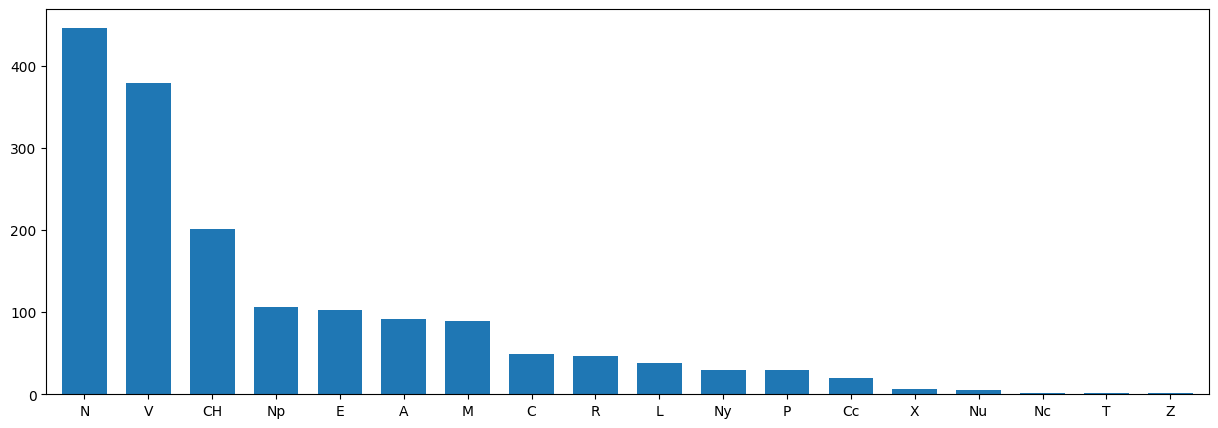

In [ ]:
print('Các từ không nằm trong vocabs', end=': ')
k = 0
for word_tag, word in zip(train_gold, train_words):
    if word == '--unk--':
      k += 1
      print(word_tag.split()[0], end=', ')
plot_tag_counts(train_gold)
print('\n')
print(k)

In [ ]:
test_gold = open('/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/test_gold.txt', encoding='utf-8').readlines()
print('Số lượng từ trong tập test_gold:', len(test_gold))
test_gold[0:5]

Số lượng từ trong tập test_gold: 502


[',\tCH\n', 'các\tL\n', 'hãng\tN\n', 'smartphone\tN\n', 'sẽ\tR\n']

In [ ]:
test_words = preprocess(vocabs_dict, '/content/gdrive/MyDrive/Colab Notebooks/CS 212 - NLP/Đồ án/test_words.txt')
print('Số lượng từ trong tập test_words:', len(test_words))
test_words[0:5]

Số lượng từ trong tập test_words: 502


[',', 'các', 'hãng', 'smartphone', 'sẽ']

Các từ không nằm trong vocabs: Covid, Mẫu, Viêm, Giáng_sinh, Tân_Sơn_Nhất, TPHCM, Bắt, Kinh_doanh, Công_ty, TNHH, Bảo_hiểm_nhân_thọ, Dai-ichi, Học_phí, PV, Thanh_Niên, Pháp, trải_nghiệm, Đài, Fox_News, Tara_Reade, Thượng_viện, Khi, Bắc, 

23


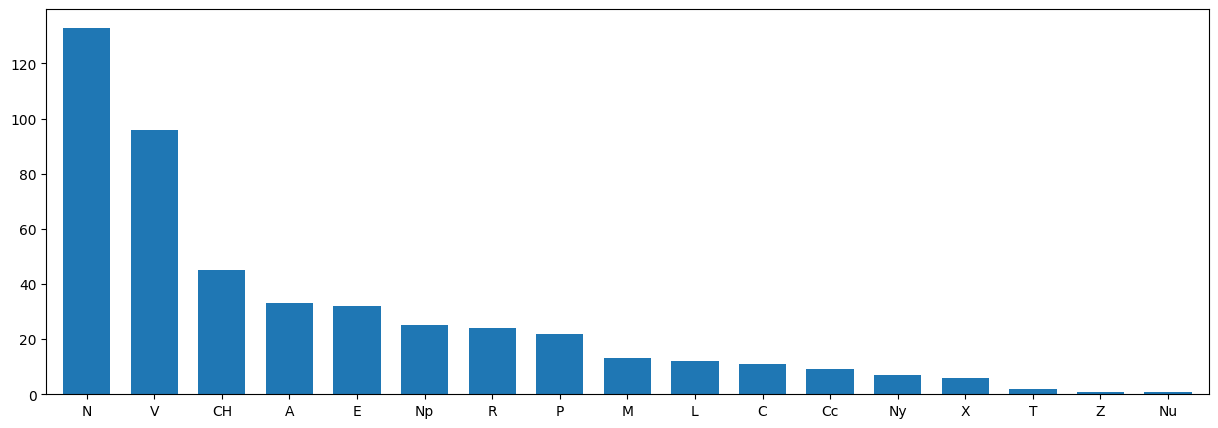

In [ ]:
print('Các từ không nằm trong vocabs', end=': ')
k = 0
for word_tag, word in zip(test_gold, test_words):
    if word == '--unk--':
      k += 1 
      print(word_tag.split()[0], end=', ')
plot_tag_counts(test_gold)
print('\n')
print(k)

Tạo các từ điển Transition Counts, Emission Counts, Tag Counts

In [ ]:
def seperate_word_tag(word_tag, vocabs_dict): 
    if not word_tag.split():
        word = '--n--'
        tag = '--s--'
    else:
        word, tag = word_tag.split()
        if word not in vocabs_dict: 
          word = '--unk--'
    return word, tag

def create_dictionaries(train_gold, vocab):
    emission_counts = defaultdict(int)
    transition_counts = defaultdict(int)
    tag_counts = defaultdict(int)
    
    prev_tag = '--s--' 
    for word_tag in train_gold:
        word, tag = seperate_word_tag(word_tag, vocab) 
        
        transition_counts[(prev_tag, tag)] += 1
        emission_counts[(tag, word)] += 1
        tag_counts[tag] += 1
        prev_tag = tag
    return transition_counts, emission_counts, tag_counts

transition_counts, emission_counts, tag_counts = create_dictionaries(train_gold, vocabs_dict)
states = sorted(tag_counts.keys())
print('Số nhãn:', len(states))
print(states)

Số nhãn: 19
['--s--', 'A', 'C', 'CH', 'Cc', 'E', 'L', 'M', 'N', 'Nc', 'Np', 'Nu', 'Ny', 'P', 'R', 'T', 'V', 'X', 'Z']


In [ ]:
print("Transition examples: ")
for example in list(transition_counts.items())[:3]:
    print(example)

Transition examples: 
(('--s--', 'N'), 17)
(('N', 'N'), 83)
(('N', 'Np'), 42)


In [ ]:
print("Emission examples: ")
for example in list(emission_counts.items())[:3]:
    print (example)

Emission examples: 
(('N', 'Đồng_bằng'), 1)
(('N', 'sông'), 1)
(('Np', 'Cửu_Long'), 1)


Thử nghiệm gán nhãn: Gãn nhãn xuất hiện thường xuyên nhất

In [ ]:
def predict_pos(words, golds, emission_counts, vocabs_dict, states):
    num_correct = 0
    all_words = set(emission_counts.keys())
    
    for word, gold in zip(words, golds): 
        gold_list = gold.split()
        if len(gold_list) != 2: 
          continue
        else: 
          true_label = gold_list[1]
    
        count_final = 0
        pos_final = ''
        if word not in vocabs_dict: 
          continue
        
        for pos in states:
            if (pos, word) not in emission_counts: 
              continue
            count = emission_counts[(pos, word)]
            
            if count > count_final:
                count_final = count
                pos_final = pos
                    
        if pos_final == true_label: 
          num_correct += 1
    accuracy = num_correct / len(golds)
    return accuracy

accuracy = predict_pos(train_words, train_gold, emission_counts, vocabs_dict, states)
print('Độ chính xác trên tập train:', accuracy)

Độ chính xác trên tập train: 0.9607957870099474


In [ ]:
accuracy = predict_pos(test_words, test_gold, emission_counts, vocabs_dict, states)
print('Độ chính xác trên tập test:', accuracy)

Độ chính xác trên tập test: 0.48804780876494025


Tạo các ma trận Transition (A), Emission (B) cho mô hình Hidden Markov

In [ ]:
def create_transition_matrix(alpha, tag_counts, transition_counts):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(all_tags)
    
    A = np.zeros((num_tags, num_tags))
    trans_keys = set(transition_counts.keys())
    
    for i in range(num_tags):
        for j in range(num_tags):
            count = 0
            key = (all_tags[i], all_tags[j])
            if key in transition_counts: 
              count = transition_counts[key]
  
            count_prev_tag = tag_counts[all_tags[i]]
            A[i, j] = (count + alpha) / (count_prev_tag + alpha * num_tags)
    return A


alpha = 0.001
for i in range(len(states)):
  tag_counts.pop(i, None)
    
A = create_transition_matrix(alpha, tag_counts, transition_counts)
df = pd.DataFrame(
    A[:5, :5], 
    index = states[:5], 
    columns = states[:5]
)
df.head()

,--s--,A,C,CH,Cc
--s--,0.016405,0.032793,0.065570,0.016405,0.000016
A,0.000011,0.097817,0.043480,0.195623,0.000011
C,0.000020,0.061221,0.020421,0.040821,0.000020
CH,0.297007,0.014855,0.029705,0.014855,0.004955
Cc,0.000050,0.050002,0.000050,0.000050,0.000050


In [ ]:
A.shape

(19, 19)

In [ ]:
def create_emission_matrix(alpha, tag_counts, emission_counts, vocabs):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(tag_counts)
    num_words = len(vocabs)
    
    B = np.zeros((num_tags, num_words))
    emis_keys = set(list(emission_counts.keys()))
    
    for i in range(num_tags):
        for j in range(num_words):
            count = 0
            key = (all_tags[i], vocabs[j])
            if key in emission_counts.keys(): 
              count = emission_counts[key]
                
            count_tag = tag_counts[all_tags[i]]
            B[i, j] = (count + alpha) / (count_tag + alpha * num_words)
    return B

cidx  = ['sản_xuất', 'kinh_tế', 'trí_tuệ_nhân_tạo', 'cường_quốc', 'vị_trí']
rvals = ['N', 'V', 'CH', 'Cc', 'A', 'L']
cols = [vocabs_dict[word] for word in cidx]
rows = [states.index(tag) for tag in rvals]

for i in range(len(states)):
  tag_counts.pop(i, None)
B = create_emission_matrix(alpha, tag_counts, emission_counts, list(vocabs_dict))

df = pd.DataFrame(B[np.ix_(rows, cols)], index=rvals, columns=cidx)
df.head()

,sản_xuất,kinh_tế,trí_tuệ_nhân_tạo,cường_quốc,vị_trí
N,0.000002,0.000002,0.001994,0.000002,0.001994
V,0.002301,0.000002,0.000002,0.000002,0.000002
CH,0.000004,0.000004,0.000004,0.000004,0.000004
Cc,0.000013,0.000013,0.000013,0.000013,0.000013
A,0.000007,0.000007,0.000007,0.000007,0.000007


In [ ]:
A = np.array([sublist[1:].tolist() for sublist in A]) #Xóa bớt cột --s--
B = B[1:]

In [ ]:
df = pd.DataFrame(
    A[:5, :5], 
    index = states[:5], 
    columns = states[1:6]
)
df.head()

,A,C,CH,Cc,E
--s--,0.032793,0.065570,0.016405,0.000016,0.049181
A,0.097817,0.043480,0.195623,0.000011,0.076082
C,0.061221,0.020421,0.040821,0.000020,0.020421
CH,0.014855,0.029705,0.014855,0.004955,0.044555
Cc,0.050002,0.000050,0.000050,0.000050,0.050002


In [ ]:
A.shape

(19, 18)

In [ ]:
B.shape

(18, 55008)

Khởi tạo thuật toán Viterbi

In [ ]:
def viterbi_initialize(states, tag_counts, A, B, corpus, vocabs_dict):
    num_tags = len(tag_counts)
    s_idx = states.index('--s--') #s_idx = 0
    
    best_probs = np.zeros((num_tags, len(corpus)))
    best_paths = np.zeros((num_tags, len(corpus)), dtype=int)
    index = vocabs_dict[corpus[0]]
    for i in range(num_tags):
        if A[s_idx, i - 1] == 0: 
          best_probs[i, 0] = float('-inf')
        else: 
          best_probs[i, 0] = np.log(A[s_idx, i - 1]) + np.log(B[i - 1, index])
    return best_probs, best_paths

In [ ]:
best_probs_train, best_paths_train = viterbi_initialize(states, tag_counts, A, B, train_words, vocabs_dict)
print('best_probs_train[0, 0]:', best_probs_train[0, 0]) 
print('best_paths_train[0, 0]:', best_paths_train[0, 0])

best_probs_train[0, 0]: -21.95219038672392
best_paths_train[0, 0]: 0


In [ ]:
best_probs_train.shape

(19, 1709)

In [ ]:
best_paths_train.shape

(19, 1709)

In [ ]:
best_probs_test, best_paths_test = viterbi_initialize(states, tag_counts, A, B, test_words, vocabs_dict)
print('best_probs_test[0, 0]:', best_probs_test[0, 0]) 
print('best_paths_test[0, 0]:', best_paths_test[0, 0])

best_probs_test[0, 0]: -21.95219038672392
best_paths_test[0, 0]: 0


In [ ]:
best_probs_test.shape

(19, 502)

In [ ]:
best_paths_test.shape

(19, 502)

Forward

In [ ]:
def viterbi_forward(A, B, corpus, best_probs, best_paths, vocabs_dict):
    num_tags = best_probs.shape[0]
    
    for i in range(1, len(corpus)): 
        if i % 5000 == 0:
          print(f'Processed {i} words...')
            
        for j in range(num_tags):
            best_prob_i = float('-inf')
            best_path_i = None
            
            for k in range(num_tags):
                index = vocabs_dict[corpus[i]]
                prob = best_probs[k, i - 1] + np.log(A[k, j - 1]) + np.log(B[j - 1, index])

                if prob > best_prob_i:
                    best_prob_i = prob
                    best_path_i = k
                    
            best_probs[j, i] = best_prob_i
            best_paths[j, i] = best_path_i
            
    return best_probs, best_paths
  

In [ ]:
best_probs_train, best_paths_train = viterbi_forward(A, B, train_words, best_probs_train, best_paths_train, vocabs_dict)
print('best_probs_train[0, 1]:', best_probs_train[0, 1]) 
print('best_paths_train[0, 4]:', best_paths_train[0, 4])

best_probs_train[0, 1]: -31.439135875658046
best_paths_train[0, 4]: 16


In [ ]:
best_probs_test, best_paths_test = viterbi_forward(A, B, test_words, best_probs_test, best_paths_test, vocabs_dict)
print('best_probs_test[0, 1]:', best_probs_test[0, 1]) 
print('best_paths_test[0, 4]:', best_paths_test[0, 4])

best_probs_test[0, 1]: -28.30883907021044
best_paths_test[0, 4]: 6


Backward

In [ ]:
def viterbi_backward(best_probs, best_paths, corpus, states):
    m = best_paths.shape[1] 
    z = [None] * m
    pred = [None] * m
    
    best_prob_for_last_word = float('-inf')
    num_tags = best_probs.shape[0]
    
    for k in range(num_tags):
        if best_probs[k, m - 1] > best_prob_for_last_word:
            best_prob_for_last_word = best_probs[k, m - 1]
            z[m - 1] = k
            
    pred[m - 1] = states[z[m - 1]]
    for i in range(m - 1, -1, -1):
        z[i - 1] = best_paths[z[i], i]
        pred[i - 1] = states[z[i - 1]]
    return pred

In [ ]:
train_pred = viterbi_backward(best_probs_train, best_paths_train, train_words, states)
test_pred = viterbi_backward(best_probs_test, best_paths_test, test_words, states)
m = len(test_pred)

print(f'Dự đoán cho test_pred[-7:{m - 1}]:')
print(test_words[-7:m-1])
print(test_pred[-7:m-1])

print('Dự đoán cho test_pred[0:7]:')
print(test_words[0:7])
print(test_pred[0:7])

Dự đoán cho test_pred[-7:501]:
['nào', 'miền', '--unk--', 'chấm_dứt', 'nắng_nóng', '?']
['Ny', 'Ny', 'E', 'N', 'M', 'Nu']
Dự đoán cho test_pred[0:7]:
[',', 'các', 'hãng', 'smartphone', 'sẽ', 'cho', 'người']
['C', 'L', 'N', 'Np', 'R', 'E', 'N']


Dự đoán trên tập test

In [ ]:
for word, tag in zip(test_words, test_pred):
    if word == '--n--': 
      print()
    else: 
      print(f'{word}/{tag}', end=' ')

,/C các/L hãng/N smartphone/Np sẽ/R cho/E người/N dùng/Ny đặt/Ny trước/E ngay/L sau/N khi/N ra_mắt/M sản_phẩm/Nu ./CH 
AstraZeneca/R cam_kết/V sẽ/R cung_cấp/V hàng/N trăm/M triệu/M liều/M vắc_xin/M --unk--/Nu -/CH 19/M cho/E các/L nước/N thu_nhập/N thấp/Np và/Cc trung_bình/Np ,/CH thậm_chí/R cung_cấp/V phi/L lợi_nhuận/N cho/E các/L quốc_gia/N nghèo/Np ./CH 
--unk--/E xe/N mới/A không_chỉ/C được/V trang_bị/N động_cơ/Np mạnh_mẽ/R hơn/A mà_còn/C tinh_chỉnh/V về/E ngoại_hình/Np ./CH 
Kế_hoạch/Ny trở_lại/Ny thi_đấu/Ny quần_vợt/Ny đỉnh_cao/Ny của/E Roger_Federer/Np đã/R không_thể/R diễn/R ra/V như/V dự_kiến/V ./CH 
Ở/Ny giải/Ny đấu/Ny này/P ,/CH Andy_Murray/Np sẽ/R được/V nhận/L suất/N đặc_cách/M tham_dự/Nu ./CH 
Đây/P là/V hãng/N hàng_không/Np lữ_hành/R cung_cấp/V các/L dịch_vụ/Z vận_chuyển/CH hàng/N không/Np và/Cc các/L gói/N du_lịch/M trong/E nước/N và/Cc quốc_tế/N ./CH 
--unk--/Ny gan/Ny do/E rượu/N là/V quá_trình/N viêm/E cấp_tính/Np hoặc/Cc mạn_tính/Ny ở/E gan/N do/E uống/M rượu/Nu ./C

Đánh giá mô hình HMM + Viterbi

In [ ]:
from sklearn.metrics import classification_report
def report(pred, gold):
    y_pred = []
    y_true = []

    for prediction, word_tag in zip(pred, gold):
        word_tag_tuple = word_tag.split()
        if len(word_tag_tuple) != 2: 
          continue 

        word, tag = word_tag_tuple
        y_pred.append(prediction)
        y_true.append(tag)
        
    print(classification_report(y_true, y_pred, zero_division=0))
    return y_pred, y_true

print('Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập train:\n')
y_pred, y_true_train = report(train_pred, train_gold)

Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập train:

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        92
           C       1.00      1.00      1.00        49
          CH       1.00      1.00      1.00       202
          Cc       1.00      1.00      1.00        20
           E       1.00      1.00      1.00       103
           L       1.00      1.00      1.00        38
           M       1.00      1.00      1.00        89
           N       1.00      0.99      1.00       447
          Nc       1.00      1.00      1.00         1
          Np       1.00      0.99      1.00       107
          Nu       0.62      1.00      0.77         5
          Ny       1.00      1.00      1.00        30
           P       1.00      1.00      1.00        29
           R       1.00      1.00      1.00        47
           T       1.00      1.00      1.00         1
           V       1.00      1.00      1.00       380
   

In [ ]:
print('Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập test:\n')
y_pred, y_true_test = report(test_pred, test_gold)

Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập test:

              precision    recall  f1-score   support

           A       0.59      0.48      0.53        33
           C       0.77      0.91      0.83        11
          CH       0.82      0.93      0.87        45
          Cc       0.75      1.00      0.86         9
           E       0.67      0.94      0.78        32
           L       0.56      0.83      0.67        12
           M       0.33      0.77      0.47        13
           N       0.91      0.46      0.61       133
          Np       0.23      0.40      0.29        25
          Nu       0.06      1.00      0.11         1
          Ny       0.09      0.71      0.16         7
           P       0.78      0.32      0.45        22
           R       0.49      0.75      0.59        24
           T       0.00      0.00      0.00         2
           V       0.85      0.35      0.50        96
           X       0.67      0.33      0.44         6
    

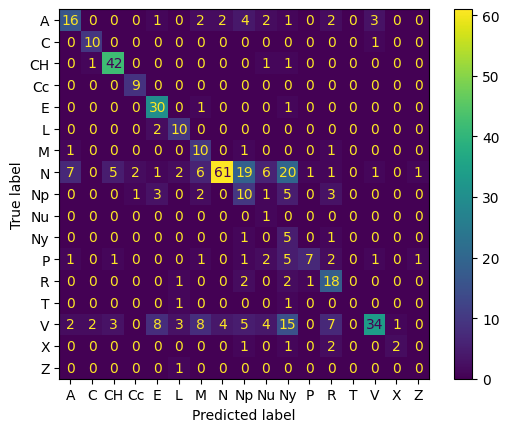

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
tag_list = ['A', 'C', 'CH', 'Cc', 'E', 'L', 'M', 'N', 'Np', 'Nu', 'Ny', 'P', 'R', 'T', 'V', 'X', 'Z']
cm = confusion_matrix(y_true_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tag_list).plot()

Phần gán nhãn bằng thư viện để so sánh được thực hiện ở file pivy_vncore_pos_tagging.ipynb